<a href="https://colab.research.google.com/github/visu21ab/computational_bias_detection/blob/main/Word_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word vector on Syria and Ukraine news coverage dataset


pre-requisit files: 
- Trained embeddings (GloVe) text file from each dataset splitted by country and frame. 

In [ ]:
# Import requiered packages 

import numpy as np
import matplotlib.pyplot as plt

# Get the interactive Tools for Matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import os
import pickle

import seaborn as sns
import scienceplots

In [ ]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

## Functions

In [ ]:
!pip install scienceplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
plt.style.use(['science', 'no-latex'])
plt.rcParams['figure.figsize'] = (6.4, 4.8)

In [ ]:
def analogy(model, x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

For looking at word vectors, I'll use Gensim.
We also use it in hw1 for word vectors.
Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

In [ ]:
## Visuvalization

def display_pca_scatterplot(model1, model2, words1=None, words2 = None, sample=0, title1='Syria', title2='Ukraine'):

    if words1 == None:
        if sample > 0:
#             words = np.random.choice(list(model.vocab.keys()), sample)
            words1 = np.random.choice(model1.index_to_key, sample)            
        else:
#             words = [ word for word in model.vocab ]
            words1 = model1.index_to_key[0:20]
            print(len(words1))
        
    word_vectors1 = np.array([model1[w] for w in words1])

    twodim1 = PCA().fit_transform(word_vectors1)[:,:2]

    
    if words2 == None:
        if sample > 0:
#             words = np.random.choice(list(model.vocab.keys()), sample)
            words2 = np.random.choice(model2.index_to_key, sample)            
        else:
#             words = [ word for word in model.vocab ]
            words2 = model2.index_to_key[0:20]
            print(len(words2))
        
    word_vectors2 = np.array([model2[w] for w in words2])

    twodim2 = PCA().fit_transform(word_vectors2)[:,:2]
    
    fig, axs = plt.subplots(1, 2, figsize=(20,10))
    axs[0].set_title(title1)
    axs[0].scatter(twodim1[:,0], twodim1[:,1], edgecolors='k', c='b')
    for word1, (x,y) in zip(words1, twodim1):
        axs[0].text(x+0.5, y+0.5, word1)
    
    axs[1].set_title(title2)
    axs[1].scatter(twodim2[:,0], twodim2[:,1], edgecolors='k', c='b')
    for word2, (x,y) in zip(words2, twodim2):
        axs[1].text(x+0.5, y+0.5, word2)
    
    plt.subplots_adjust(wspace=0.4)
    plt.suptitle('Word Vectors From GloVe Embeddings', fontsize=24, y=1)
    plt.rcParams.update({'font.size':8})
    fig.tight_layout()
    plt.show()

## 2a) Syria and Ukraine datasets

In [ ]:
#path to word vectors file.
path1 = os.path.abspath('drive/MyDrive/Master Thesis/embeddings/syria_violence_vectors.txt')
path2 = os.path.abspath('drive/MyDrive/Master Thesis/embeddings/ukraine_violence_vectors.txt')

glove_file1 = datapath(path1)
glove_file2 = datapath(path2)

# building the model.
model1 = KeyedVectors.load_word2vec_format(glove_file1,binary=False, no_header=True)
model2 = KeyedVectors.load_word2vec_format(glove_file2,binary=False, no_header=True)

20
20


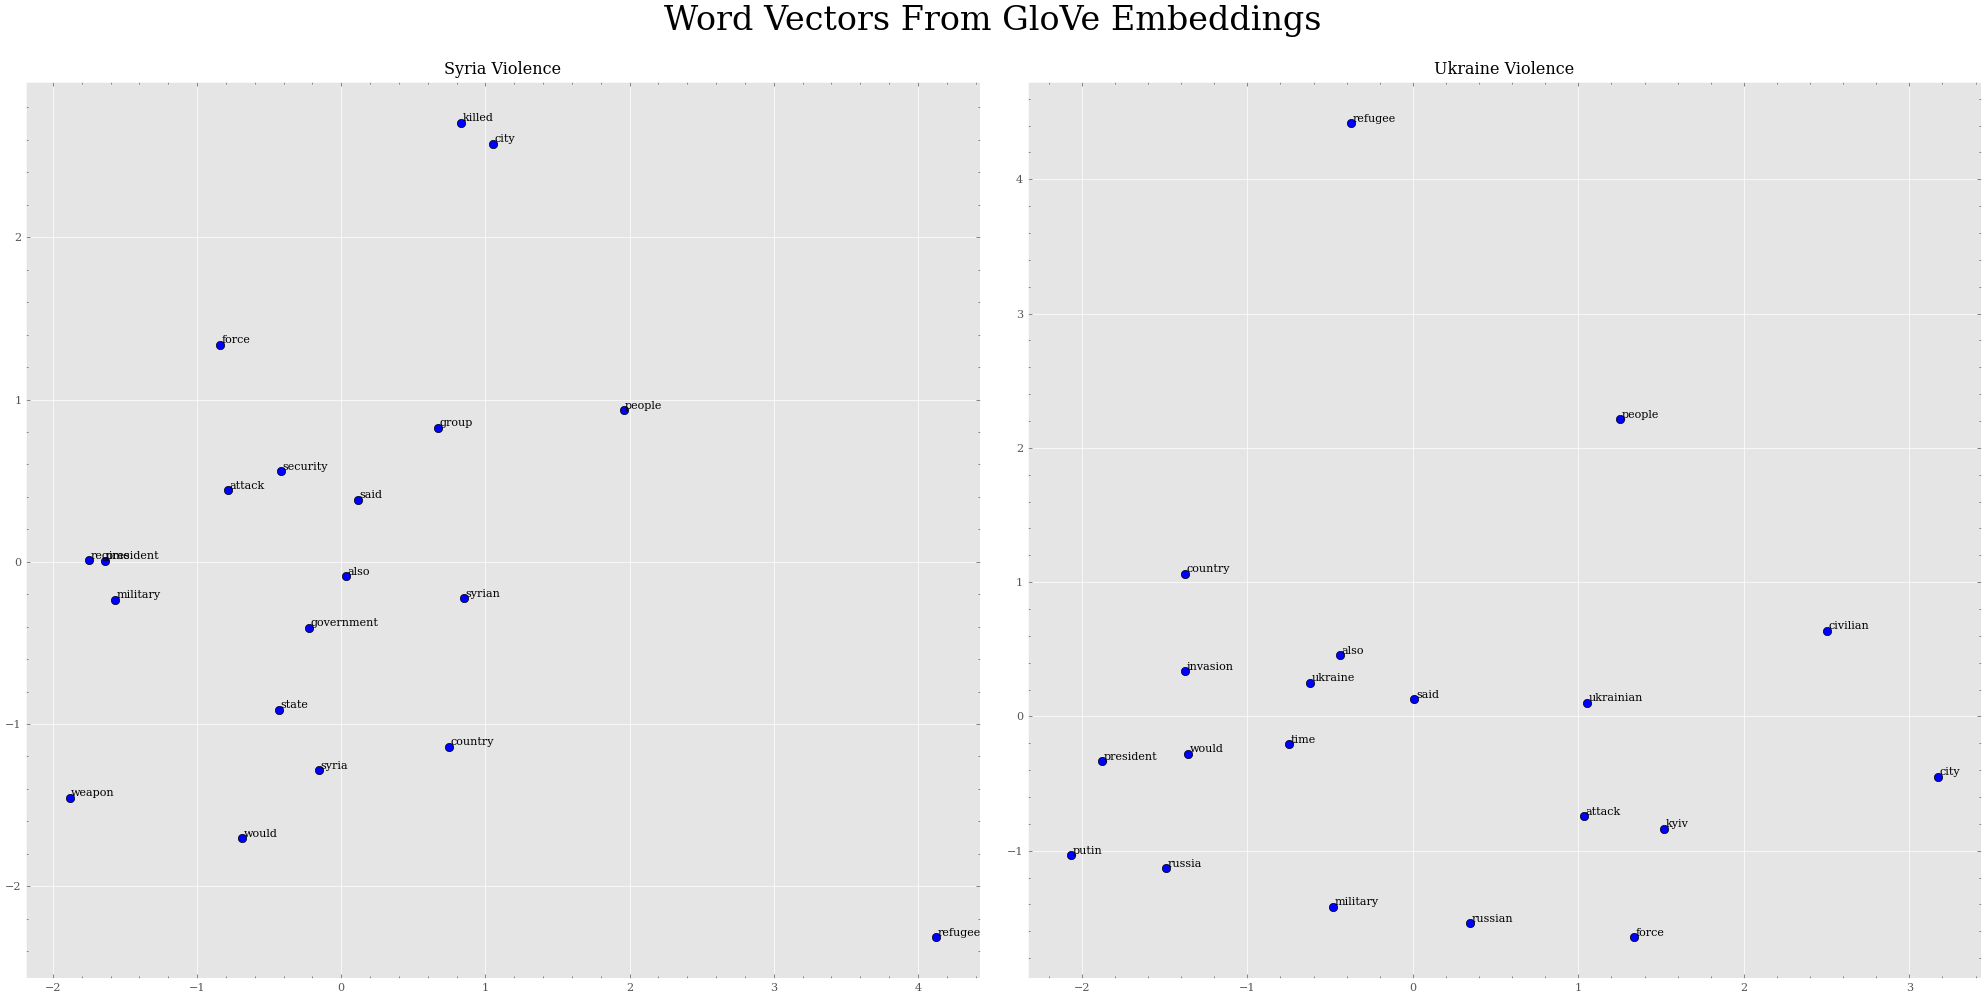

In [ ]:
# Display scatterplot on chosen datasets
display_pca_scatterplot(model1, model2, title1='Syria Violence', title2='Ukraine Violence')